In [8]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz
import os
import sys
from sklearn.metrics import *

In [9]:
train = pd.read_csv('data/train_final4.csv')
test = pd.read_csv('data/test_final3.csv')

# Decision Tree

In [10]:
def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf, feature_names=X_ls)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)

In [11]:
def plot_fi(model):
   n = len(X_ls)
   plt.barh(range(n), model.feature_importances_, align='center')
   plt.yticks(np.arange(n), train[X_ls].columns)
   plt.xlabel('importance')
   plt.ylabel('feature')
   plt.ylim(-1, n)

In [12]:
X_ls = ['payment_method_id', 'payment_plan_days',
       'actual_amount_paid', 'is_auto_renew', 'transaction_date',
       'membership_expire_date', 'is_cancel', 'num_unq', 'total_secs', 'city',
       'gender', 'registered_via', 'registration_init_time', 'age', 'pro_25',
       'pro_50', 'pro_75', 'pro_985', 'pro_100', 'disc_user']
y = train['is_churn']

In [13]:
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=6).fit(train[X_ls], y)

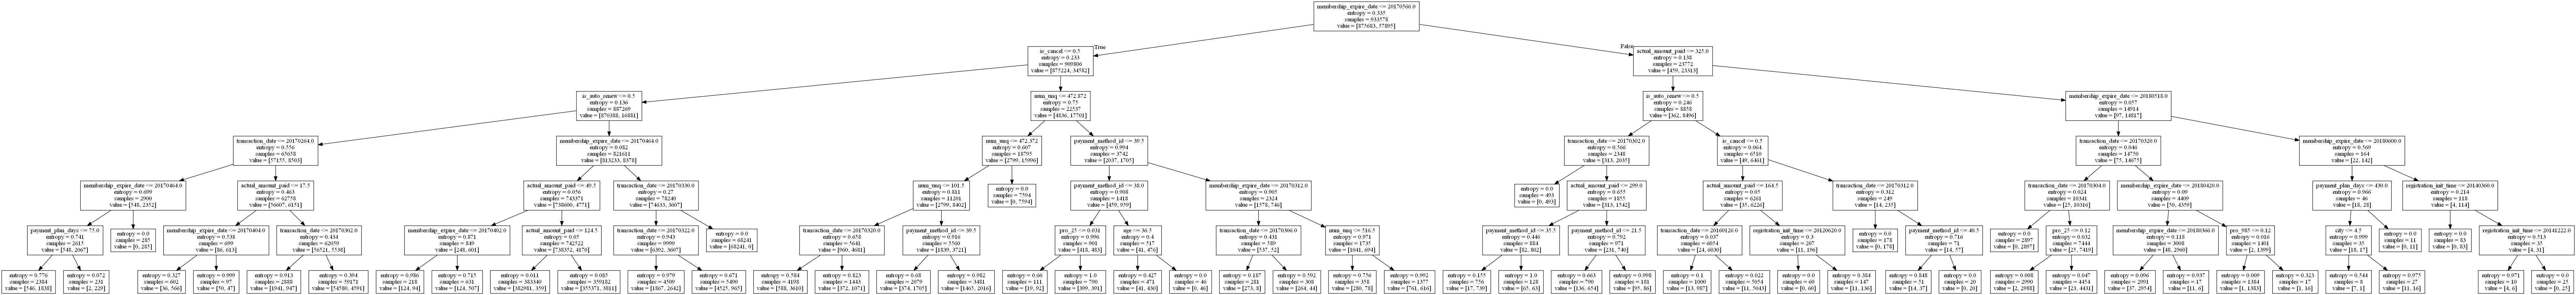

In [14]:
draw_decision_tree(model1)

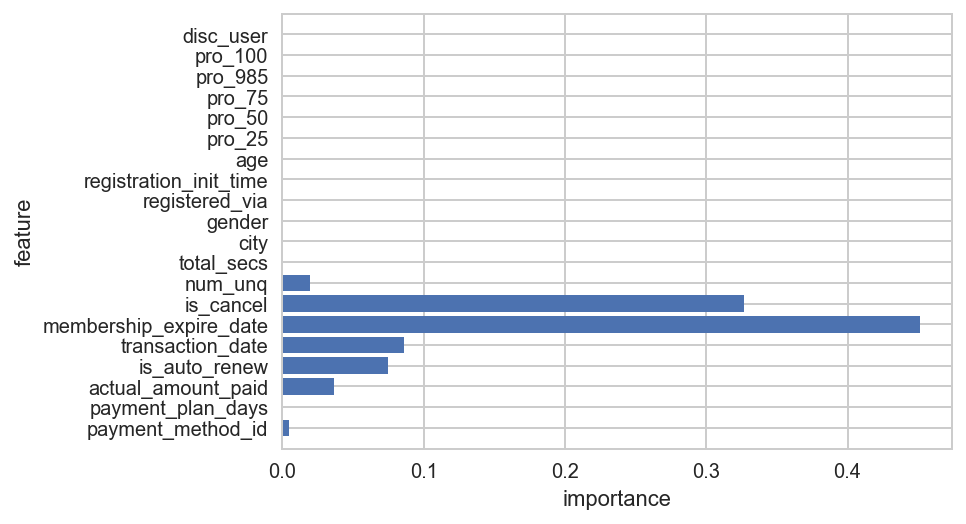

In [15]:
plot_fi(model1)

In [18]:
# seleting important features
X_ls = ['is_cancel', 'num_unq', 'membership_expire_date', 'transaction_date','is_auto_renew','actual_amount_paid','payment_method_id']

In [19]:
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=6).fit(train[X_ls], y)

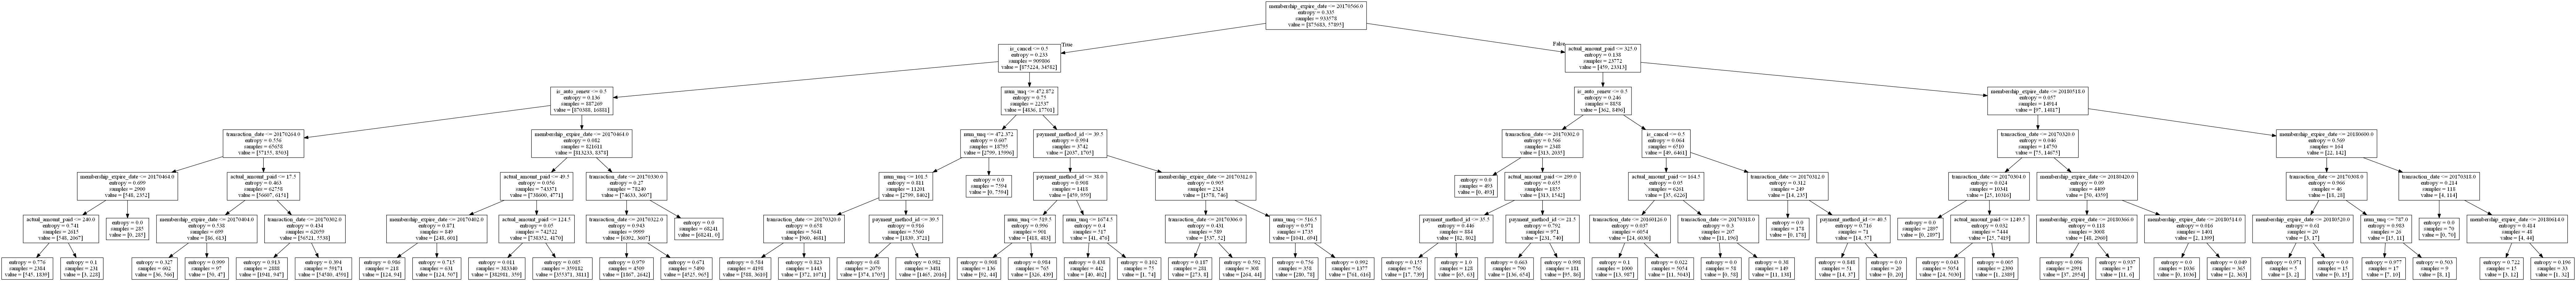

In [20]:
draw_decision_tree(model2)

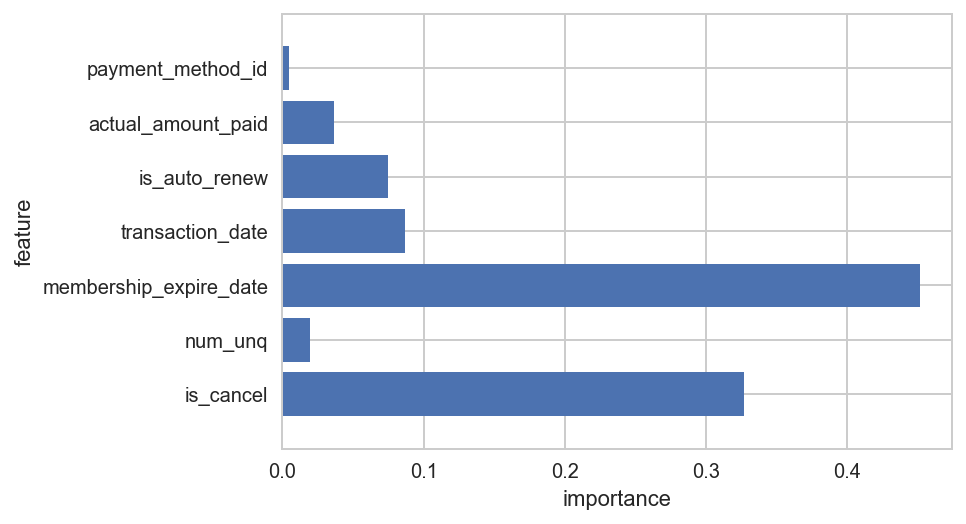

In [21]:
plot_fi(model2)

In [22]:
result = model2.predict(test[X_ls])

result_df = pd.DataFrame(result, columns=['is_churn'])

test['is_churn'] = result_df

result2_df = test.drop(X_ls, axis=1)

result2_df.to_csv('sample', index=False)